In [1]:
import estimation_post as est
import numpy as np
from numpy import random
from tabulate import tabulate
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
 
# Set random seed
seed = 42
rng = random.default_rng(seed=seed)

Problem Set 07 - Least Squares and Maximum Likelihood
===================================================

In this exercise we will consider the linear regression model. Of
course, when estimated with OLS, the estimator, which minimizes the sum
of squared residuals, has a closed form solution. This also goes for the
maximum likelihood estimator when the residuals are assumed Gaussian. We
will however do the maximization numerically using the scipy library and the `optimize` class, more specifically we will use its `minimize` function. The purpose of this exercise is to learn to do
numerical maximization and to be familiar with $M$-estimators by viewing
the maximum likelihood estimator of the linear model as an
$M$-estimator.

The Model
---------

We consider a linear model with the following characteristics

$$y_{i}=\beta _{0}+\beta _{1}x_{1i}+....+\beta _{k-1}x_{k-1i}+\varepsilon _{i} \quad i=1,..,N$$

with $\varepsilon_{i} \sim N(0,\sigma_{\varepsilon}^2)$.

The (conditional) likelihood contribution for observation $i$ is,
$$f\left(y_{i}\left|x_{i};\beta\sigma^{2}\right.\right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left\{ -\frac{1}{2}\frac{\varepsilon_{i}^{2}}{\sigma^{2}}\right\},$$
where
$\varepsilon_{i}=y_{i}-\beta_{0}-\beta_{1}x_{1i}-\cdots-\beta_{k-1}x_{k-1i}$.
The likelihood function is given as,
$$
f\left(y_{i}\left|x_{i};\beta\sigma^{2}\right.\right)=\left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N}\prod_{i=1}^{N}\exp\left\{ -\frac{1}{2}\frac{\varepsilon_{i}^{2}}{\sigma^{2}}\right\}.
$$
The (conditional) log-likelihood contribution of observation $i$ is,
$$
\log L\left(\beta,\thinspace\sigma^{2}\right)=-\frac{1}{2}\log\left(2\pi\right)-\frac{1}{2}\log\left(\sigma^{2}\right)-\frac{1}{2}\frac{\varepsilon_{i}^{2}}{\sigma^{2}}
$$
where $\log$ denotes the natural logarithm. Finally, the (conditional)
log-likelihood function is given as,
$$
\log L\left(\beta,\thinspace\sigma^{2}\right)=-\frac{N}{2}\log\left(2\pi\right)-\frac{N}{2}\log\left(\sigma^{2}\right)-\frac{1}{2}\sum_{i=1}^{N}\frac{\varepsilon_{i}^{2}}{\sigma^{2}},
$$
Often the term $-\frac{1}{2}\log\left(2\pi\right)$
($-\frac{N}{2}\log\left(2\pi\right)$) is dropped as it is not part of
the maximization problem.


In [2]:
# Simulate dataset
n = 100
beta = np.array([[1, 1]]).T  # First is constant
sigma = 3
true_theta = [beta, sigma]
y, x = est.sim_data(n, true_theta, rng)

# Find some starting values that are 0.8 closed form solution.
theta0 = est.est_ols(y, x)

### Question 1: Write a function for the likelihood contribution.
Open the file `estimation_ante.py`, and fill in the function `criterion` with the **likelihood contribution**. It should return a $n \times 1$ vector of likelihood contributions.

*Hint:* The sum of the likelihood contributions should be close to -162.8, given `theta0, x, y`, which I have written a function to check for you, so you know if you have written it correctly.

In [3]:
# Fill in the missing parts of the est.criterion() function.
# First, calculate the residual.
# Then calculate the likelihood value, using the likelihood contribution equation from above.
# Test if you got it right with the cell below. You might have to "reseed" by running the first cell in this notebook again.

In [4]:
np.isclose(np.sum(est.criterion(theta0, y, x)), -162.800)

True

### Question 2: Finish the function to solve the likelihood function

Now finish up the `estimate` function, which takes an function to minimize `func`, starting values `theta0`, the data `y` and `x`, and what type of variance to use `cov_type`.

You need to use the `optimize.minimize` function, which takes the following inputs: the objective function `obj_func`, and the starting values `theta0`.

You also need to finish up the `variance` function, which takes the function `func` (not the objective function), the data `y` and `x`, the results from the minimizer `result`, and finaly what type of variance to calculate `cov_type`.

### Different ways to estimate the assymptotic variance

The log--likelihood function is a nonlinear function, which must in
general be maximized numerically in order to obtain the ML estimates.
For a correctly specified model, the ML estimator $\boldsymbol{\hat{\theta}}$ is
an asymptotic normal and $\sqrt{N}$-consistent estimator of
$\boldsymbol{\theta }%
_{0}$, i.e.,

$$
\sqrt{N}\left( \boldsymbol{\hat{\theta}}-\boldsymbol{\theta }_{0}\right) \overset{d}{\rightarrow }N\left( \mathbf{0,A}_{0}^{-1}\right)
$$ The matrix $\mathbf{A}_{0}$ can be estimated by $\mathbf{\hat{A}}_{0}=-\frac{1}{N}\sum_{i=1}^{N}\mathbf{H}_{i}( \boldsymbol{\hat{\theta}})$ where $\mathbf{H}_{i}( \boldsymbol{\hat{\theta}})$ is the Hessian and is
given by the second derivative of the log--likelihood contribution of
observation $i$, i.e., $\mathbf{H}_{i}( \mathbf{\hat{\theta}}) =\nabla _{\theta }^{2}\ell _{i}( \boldsymbol{\hat{\theta}})$. By the information identity the matrix $\mathbf{A}_{0}$ can
alternatively be estimated by $\mathbf{\hat{B}}_{0}=\frac{1}{N}\sum_{i=1}^{N}\mathbf{s}_{i}( \boldsymbol{\hat{\theta}}) \mathbf{s}_{i}( \boldsymbol{\hat{\theta}}) ^{\prime }$ where $\mathbf{s}_{i}( \boldsymbol{\hat{\theta}})$ i s the score vector and is given by
the first derivative of the log--likelihood contribution of observation
$i$, i.e., $\mathbf{s}_{i}( \boldsymbol{\hat{\theta}})
=\nabla _{\theta }\ell _{i}( \boldsymbol{\hat{\theta}})$. Hence,
$\widehat{\text{Avar}}( \boldsymbol{\hat{\theta}})$ can be taken to be any
of the two matrices 
$$
\begin{aligned}
\mathbf{\hat{A}}_{0}^{-1} &=& -\frac{1}{N}\left[ \sum_{i=1}^{N}\mathbf{H}_{i}( 
\boldsymbol{\hat{\theta}}) \right] ^{-1}\\
\mathbf{\hat{B}}_{0} &=& \frac{1}{N}\left[ \sum_{i=1}^{N}\mathbf{s}_{i}( 
\boldsymbol{\hat{\theta}}) \mathbf{s}_{i}( \boldsymbol{\hat{\theta}}) ^{\prime }\right] \end{aligned}
$$ 
Lastly, the `sandwich` formula can be used and $\widehat{\text{Avar}}( \boldsymbol{\hat{\theta}})$ can be estimated
as 
$$
\begin{aligned}
\widehat{\text{Avar}}( \boldsymbol{\hat{\theta}})=\frac{1}{N}\mathbf{\hat{A}}_{0}^{-1}\mathbf{\hat{B}}_{0}\mathbf{\hat{A}}_{0}^{-1}
\end{aligned}
$$

*Programming hint:* To calculate the variance you have to do the following:

The optimizer will return the inverse of the Hessian, and can be accessed through `result.hess_inv`, which is $\mathbf{\hat{A}}_{0}^{-1}$. So for the `Hessian` variance, you would calculate:
$$
\widehat{\text{Avar}}( \boldsymbol{\hat{\theta}}) = \frac{1}{N}\mathbf{\hat{A}}_{0}^{-1}
$$

For the `Outer Product` you are already given $\mathbf{\hat{B}}_{0}$ as `b`, and can calculate the variance using:

$$
\widehat{\text{Avar}}( \boldsymbol{\hat{\theta}}) = \frac{1}{N}\mathbf{\hat{B}}_{0}^{-1}
$$

In [ ]:
# Fill in the missing code in estimate and variance.
# You can start by focusing on finishing the estimate function, you can see in the table below what the estimates should be close to.

# For the estimate function, you need to read the documentation for the optimize.minimize function, to pass the obj_func and theta0 to that function.
# Extra: Write it so that you pass the optimize.minimize the boolean "disp" for the disp option, and the **kwards arguments.

# For the variance function, look at the three functions above for the avar(theta).

In [5]:
results1 = est.estimate(est.criterion, theta0, y, x)

Optimization terminated successfully.
         Current function value: 1.568403
         Iterations: 15
         Function evaluations: 64
         Gradient evaluations: 16


In [7]:
label = ['beta 1', 'beta 2', 'sigma2']
est.print_table(label, results1, title='Maximum Likelihood results', floatfmt='.3f'
)

Maximum Likelihood results
          Beta     Se    t-values
------  ------  -----  ----------
beta 1   0.986  0.306       3.225
beta 2   1.358  0.397       3.418
sigma2   2.911  0.230      12.656
In 15 iterations and 64 function evaluations.


Your table should look a little like this: <br>

Maximum Likelihood results <br>

|        |   Beta |   Se |   t-values |
|--------|--------|------|------------|
| beta 1 |   0.99 | 0.31 |       3.23 |
| beta 2 |   1.36 | 0.40 |       3.42 |
| sigma2 |   2.91 | 0.23 |      12.66 |

### Question 3: Solve the same function, but use instead the 'Sandwich' and 'Hessian' variances instead.

In [8]:
results_san = est.estimate(est.criterion, theta0, y, x, cov_type='Sandwich')
est.print_table(label, results_san, title='Maximum Likelihood results', floatfmt='.3f'
)

Optimization terminated successfully.
         Current function value: 1.568403
         Iterations: 15
         Function evaluations: 64
         Gradient evaluations: 16
Maximum Likelihood results
          Beta     Se    t-values
------  ------  -----  ----------
beta 1   0.986  0.284       3.474
beta 2   1.358  0.336       4.042
sigma2   2.911  0.186      15.610
In 15 iterations and 64 function evaluations.


In [9]:
results_he = est.estimate(est.criterion, theta0, y, x, cov_type='Hessian')
est.print_table(label, results_he, title='Maximum Likelihood results', floatfmt='.3f'
)

Optimization terminated successfully.
         Current function value: 1.568403
         Iterations: 15
         Function evaluations: 64
         Gradient evaluations: 16
Maximum Likelihood results
          Beta     Se    t-values
------  ------  -----  ----------
beta 1   0.986  0.284       3.468
beta 2   1.358  0.362       3.754
sigma2   2.911  0.200      14.583
In 15 iterations and 64 function evaluations.


### Question 3: Conduct a Monte Carlo study for different sample sizes
Conduct a Monte Carlo study of the Maximum Likelihood estimator. Try
various values of $N$ to illustrate the consistency of the
estimator. Is the estimator biased? Compare the three types of
standard error estimates to the Monte Carlo sampling standard
deviation. Is the estimator of $\sigma$ consistent?

In [10]:
nn = [5, 15, 50, 1000]  # Observation size
s = 100  # Number of replications

In [11]:
# Initialize containers for parameters for each replication
list_theta = np.zeros((len(theta0), s))
list_se = np.zeros((len(theta0), s))

In [12]:
# Initialize containers for all MX experiments
theta_n = np.zeros((len(nn), len(theta0), s))
se_theta_n = np.zeros((len(nn), len(theta0), s))
MC_se = np.zeros((len(nn), len(theta0), 1))

In [ ]:
for idx, n in enumerate(nn):
    for i in range(s):
        y, x =  # Simulate n observations
        theta0 =  # Create new starting values
        results =  # Estimate using the new sample and starting values
        list_theta[:, i] = results['b_hat']
        list_se[:, i] = results['se']
    theta_n[idx] = list_theta
    se_theta_n[idx] = list_se
    MC_se[idx] = np.std(list_theta, axis=1, ddof=1).reshape(-1, 1)

In [13]:
for idx, n in enumerate(nn):
    for i in range(s):
        y, x = est.sim_data(n, true_theta, rng)
        theta0 = est.est_ols(y, x)
        results = est.estimate(est.criterion, theta0, y, x, disp=False)
        list_theta[:, i] = results['b_hat']
        list_se[:, i] = results['se']
    theta_n[idx] = list_theta
    se_theta_n[idx] = list_se
    MC_se[idx] = np.std(list_theta, axis=1, ddof=1).reshape(-1, 1)

In [14]:
x_all = np.zeros((len(nn), s))
x_all_se = np.zeros((len(nn), s))

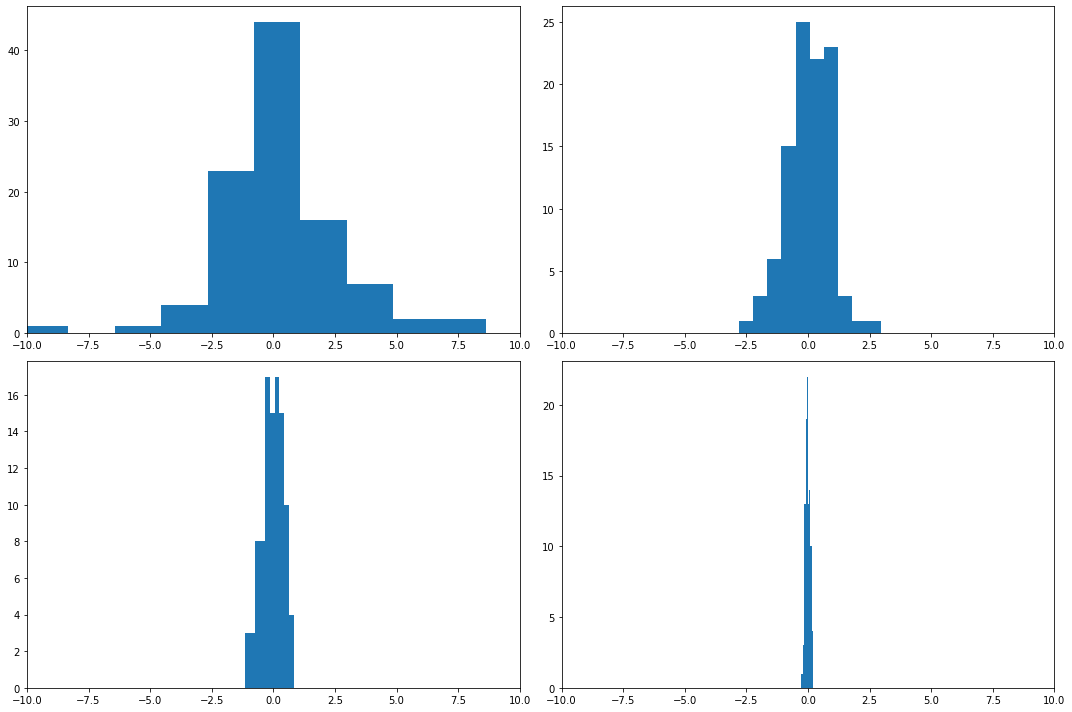

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel() 

for i, ax in enumerate(axes):
    x_theta = theta_n[i, 1, :] - true_theta[0][1]
    x_all[i, :] = x_theta
    ax.hist(x_theta)
    ax.set_xlim(-10, 10)

plt.tight_layout()

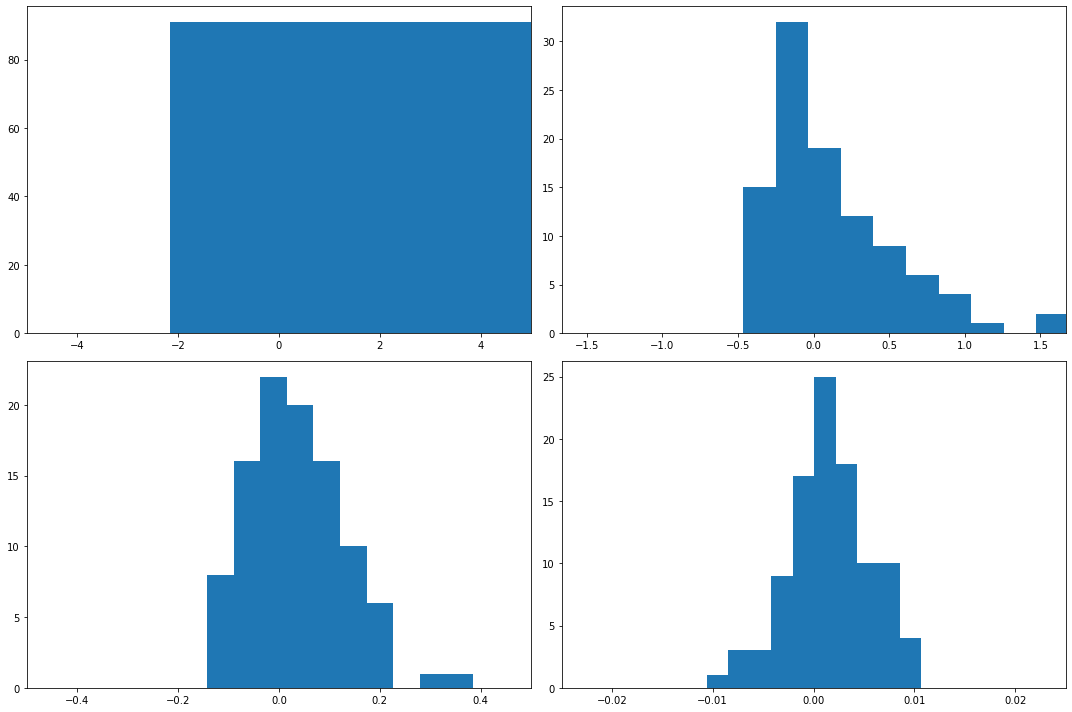

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel() 

for i, ax in enumerate(axes):
    x_theta_se = se_theta_n[i, 1, :] - MC_se[i, 1, :]
    x_all_se[i, :] = x_theta_se
    ax.hist(x_theta_se)
    ax.set_xlim(-25/nn[i], 25/nn[i])

plt.tight_layout()

### Question 4: Solve the model using another method.

Try to solve the same model, but instead of using the default model chosen by scipy. Some of the methods require you to give it a jacobian and a hessian, but the 'CG' method does not. If you use this method, does the results differ? Is it faster?

In [ ]:
n = 100
y, x = est.sim_data(n, true_theta, rng)
theta0 = est.est_ols(y, x)
results2 =  # Use the estimate function, and use the CG method.

In [20]:
n = 100
y, x = est.sim_data(n, true_theta, rng)
theta0 = est.est_ols(y, x)
results2 = est.estimate(est.criterion, theta0, y, x, method='CG')

Optimization terminated successfully.
         Current function value: 1.644164
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 20


In [21]:
est.print_table(label, results1, title='Maximum Likelihood results', floatfmt='.2f'
)

Maximum Likelihood results
          Beta    Se    t-values
------  ------  ----  ----------
beta 1    0.99  0.31        3.23
beta 2    1.36  0.40        3.42
sigma2    2.91  0.23       12.66
In 15 iterations and 64 function evaluations.


In [22]:
est.print_table(label, results2, title='Maximum Likelihood results', floatfmt='.2f'
)

Maximum Likelihood results
          Beta    Se    t-values
------  ------  ----  ----------
beta 1    0.49  0.37        1.32
beta 2    1.19  0.28        4.21
sigma2    3.14  0.24       13.27
In 7 iterations and 80 function evaluations.
